In [32]:
X = np.genfromtxt('cancer-gene-data2.csv', delimiter=',') #load data

In [28]:
X.shape #checking shape of data

(801, 10266)

In [29]:
tumor = np.genfromtxt('cancer-gene-labels.csv', delimiter=',') #labels (5) for different tumor types

In [40]:
tumor.shape, tumor #BRCA, KIRC, COAD, LUAD and PRAD.

((801,),
 array([1., 2., 1., 1., 3., 1., 4., 1., 3., 1., 3., 4., 1., 3., 3., 3., 2.,
        4., 4., 1., 3., 4., 2., 3., 4., 2., 5., 3., 3., 3., 3., 3., 4., 3.,
        1., 3., 4., 2., 3., 3., 4., 1., 1., 4., 4., 3., 1., 5., 3., 2., 3.,
        2., 3., 1., 5., 3., 3., 5., 4., 3., 2., 4., 3., 2., 1., 5., 3., 1.,
        4., 3., 4., 3., 3., 2., 3., 2., 3., 4., 1., 5., 3., 1., 3., 3., 1.,
        1., 3., 3., 4., 3., 1., 1., 3., 3., 3., 1., 5., 3., 1., 3., 3., 4.,
        3., 4., 2., 4., 2., 5., 2., 2., 1., 3., 2., 1., 3., 4., 4., 4., 3.,
        3., 2., 4., 2., 3., 1., 1., 1., 3., 4., 2., 5., 3., 5., 3., 3., 4.,
        2., 3., 4., 5., 3., 1., 3., 4., 2., 5., 1., 3., 2., 2., 2., 2., 3.,
        3., 2., 3., 3., 1., 1., 2., 1., 2., 4., 3., 1., 2., 5., 4., 2., 3.,
        4., 2., 3., 2., 3., 3., 3., 1., 3., 4., 5., 4., 3., 1., 1., 1., 2.,
        2., 3., 2., 2., 4., 2., 1., 2., 3., 3., 3., 2., 2., 3., 4., 4., 4.,
        4., 1., 3., 1., 3., 2., 2., 3., 1., 3., 1., 3., 3., 3., 2., 3., 4.,
   

In [33]:
normalised_data = normalise(X) #normalise the data

In [34]:
normalised_data.sum(axis=0) #ensure it has zero mean -> good enough

array([ 9.53126467e-14,  2.27906582e-12,  1.92181826e-11, ...,
       -7.37132577e-13, -4.09744461e-12,  1.91957561e-13])

In [35]:
U,s,V = np.linalg.svd(normalised_data) #computing the SVD
U.shape,s.shape,V.shape #checking shape

((801, 801), (801,), (10266, 10266))

In [36]:
s**2 #singular values are the square root of eigenvalues of X^T X

array([8.54249244e+05, 7.01018828e+05, 6.34060036e+05, 4.16039892e+05,
       3.26676687e+05, 2.34975206e+05, 1.92196355e+05, 1.75017581e+05,
       1.32849217e+05, 9.82559950e+04, 8.63282506e+04, 7.15827030e+04,
       6.88796488e+04, 6.08988821e+04, 5.39495880e+04, 5.22308188e+04,
       4.98289007e+04, 4.76364421e+04, 4.30281733e+04, 4.19352121e+04,
       4.04815142e+04, 3.78232042e+04, 3.67497977e+04, 3.61436302e+04,
       3.48036530e+04, 3.39128710e+04, 3.33754556e+04, 3.20571667e+04,
       3.14047924e+04, 2.98173634e+04, 2.89545530e+04, 2.79844485e+04,
       2.75065443e+04, 2.73791637e+04, 2.63539599e+04, 2.57288547e+04,
       2.51663314e+04, 2.43020209e+04, 2.31954317e+04, 2.28375253e+04,
       2.24317373e+04, 2.19463247e+04, 2.17657744e+04, 2.13280946e+04,
       2.10858523e+04, 2.08599901e+04, 2.05228072e+04, 2.04240184e+04,
       1.97997945e+04, 1.96125565e+04, 1.91424183e+04, 1.89528516e+04,
       1.88431261e+04, 1.86219571e+04, 1.79528575e+04, 1.76898951e+04,
      

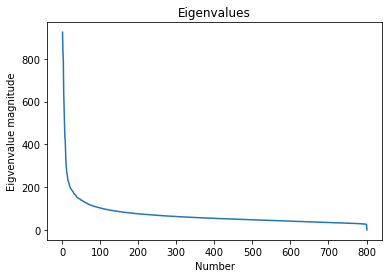

In [38]:
import matplotlib.pyplot as plt
#plotting eigenvalues against it's index, to find the inflexion point, i.e. how many dimensions we should take
x_plot = np.linspace(1, 801, num=801)
  
plt.plot(x_plot, s)
plt.title('Eigenvalues')
plt.xlabel('Number')
plt.ylabel('Eigvenvalue magnitude')
plt.show()

#seems to be at around x = 20 

In [37]:
V #eigenvectors stored as rows

array([[-1.48511886e-03,  6.94642142e-03,  1.65153484e-02, ...,
        -6.09362290e-04, -2.83509407e-03, -1.54456886e-03],
       [ 3.27149724e-03,  7.02305564e-04,  1.32921085e-03, ...,
         1.11728407e-02, -2.14145378e-02,  1.49180451e-03],
       [ 2.75709072e-04, -8.62249114e-03,  5.04418941e-03, ...,
         1.14621898e-02, -3.59996525e-03,  3.02284498e-03],
       ...,
       [-2.74430787e-03,  1.03886845e-04,  1.02917769e-03, ...,
         9.54404737e-01,  3.58733953e-03,  4.29435363e-03],
       [-7.32737235e-03,  5.78831960e-03,  3.11155518e-03, ...,
         2.89065634e-03,  9.47549620e-01,  1.00220016e-03],
       [ 5.17430705e-03, -1.48143870e-02,  3.31760805e-04, ...,
         3.64157466e-03,  1.45003420e-03,  8.49003703e-01]])

In [49]:
# This creates a list of indices for which the diagnosis column of X is 1,
# ie. those patients who have been diagnosed with 'Z' tumor (BRCA, KIRC, COAD, LUAD and PRAD)

BRCA = [index for index,value in enumerate(tumor) if value == 1] #list of index values where patient has BRCA

KIRC = [index for index,value in enumerate(tumor) if value == 2]

COAD = [index for index,value in enumerate(tumor) if value == 3]

LUAD = [index for index,value in enumerate(tumor) if value == 4]

PRAD = [index for index,value in enumerate(tumor) if value == 5]

In [50]:
X1 = np.matmul(normalised_data,V[0,:]) #getting the new coordinate system by dot product eigenvector with the data
X2 = np.matmul(normalised_data,V[1,:]) 

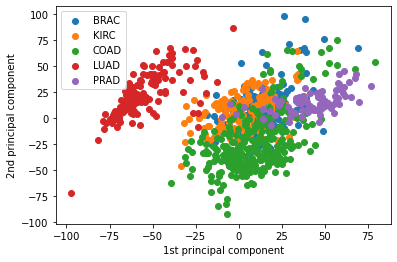

In [51]:
#Creating scatterplot of the two eigenvector with largest eigenvalue as the component directions
scatter(X1[BRCA], X2[BRCA])
scatter(X1[KIRC], X2[KIRC])
scatter(X1[COAD], X2[COAD])
scatter(X1[LUAD], X2[LUAD])
scatter(X1[PRAD], X2[PRAD])

xlabel("1st principal component")
ylabel("2nd principal component")
legend(["BRAC", "KIRC", "COAD", "LUAD", "PRAD"])

plt.show()

In [52]:
x_list = [X1, X2] #creating list of the new coordinate system

for i in range(2, 21):
    x_new = np.matmul(normalised_data,V[i,:]) #getting the new coordinate system by dot product eigenvector with the data
    x_list.append(x_new)

In [66]:
#Function to create a scatterplot of the two eigenvector with largest eigenvalue as the component directions
def createScatter(index1, index2, s1 = 1):
    '''
    Create scatter of two eigenvectors
    Arg: index1, index2 - the two respective component direction indexes (corresponding to xth largest eigvenvalue)
    Returns: - (plots the scattergraph)
    '''
    scatter(x_list[index1][BRCA], x_list[index2][BRCA], s = s1)
    scatter(x_list[index1][KIRC], x_list[index2][KIRC], s = s1)
    scatter(x_list[index1][COAD], x_list[index2][COAD], s = s1)
    scatter(x_list[index1][LUAD], x_list[index2][LUAD], s = s1)
    scatter(x_list[index1][PRAD], x_list[index2][PRAD], s = s1)

    xlabel(f'{index1} principal component')
    ylabel(f"{index2} principal component")
    legend(["BRAC", "KIRC", "COAD", "LUAD", "PRAD"])
    plt.show()

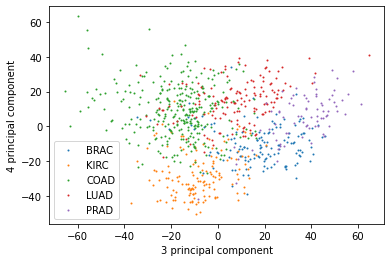

In [67]:
#creating scatter for the different component directions
createScatter(3,4)

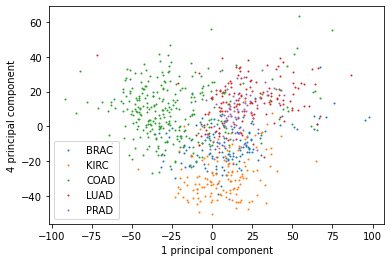

In [68]:
createScatter(1,4)

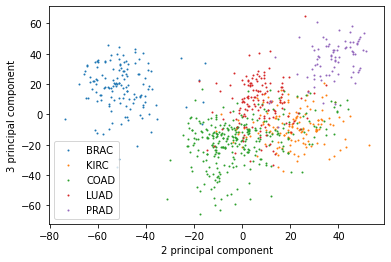

In [69]:
createScatter(2,3)

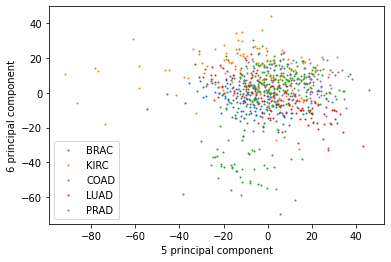

In [70]:
createScatter(5,6) #starting to become one single group

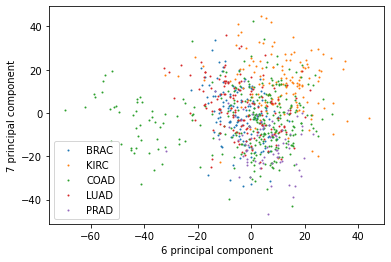

In [71]:
createScatter(6,7)

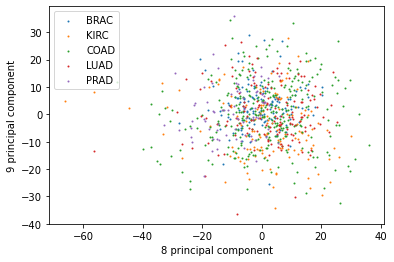

In [72]:
createScatter(8,9)

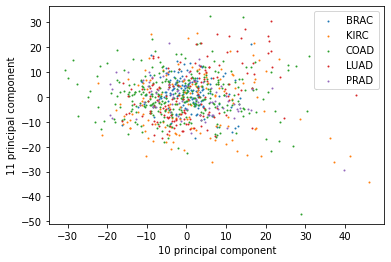

In [73]:
createScatter(10,11) #past index 10, the plots are all grouped together, not useful

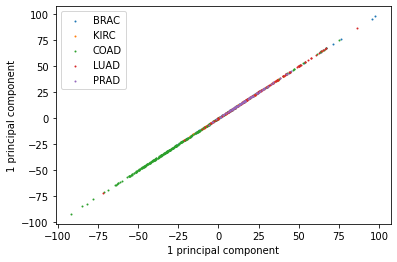

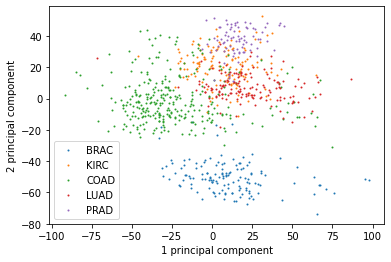

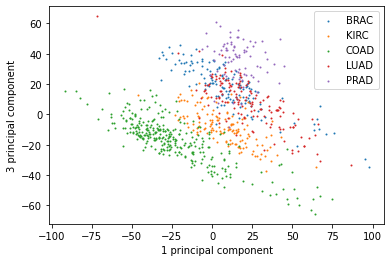

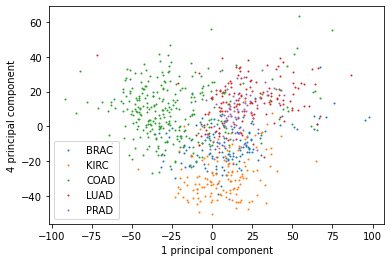

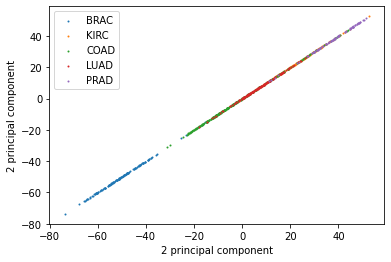

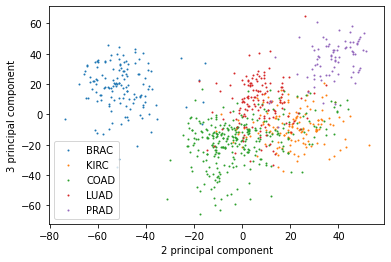

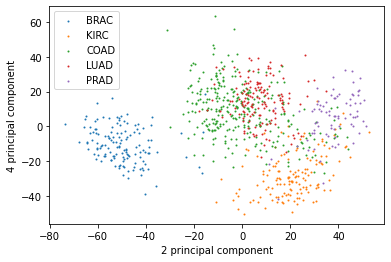

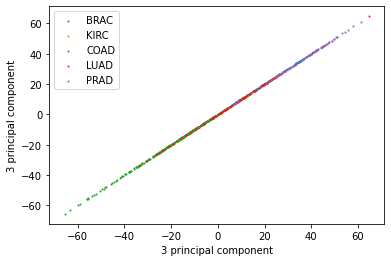

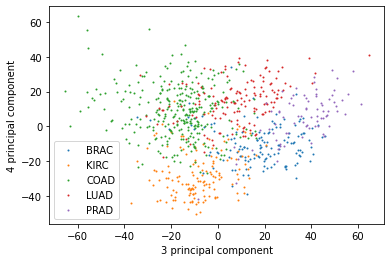

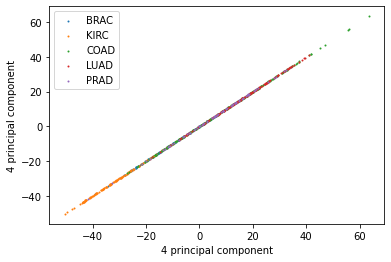

In [74]:
#Looking at only eigenvectors from 1->4 and it's combinations
createScatter(1,1)
createScatter(1,2)
createScatter(1,3)
createScatter(1,4)
createScatter(2,2)
createScatter(2,3)
createScatter(2,4)
createScatter(3,3)
createScatter(3,4)
createScatter(4,4)